In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.35793246 0.61691619 0.17831382 ... 0.73567129 0.05828024 0.5563951 ]
 [0.40049592 0.69027665 0.19951797 ... 0.82315348 0.06521063 0.62255871]
 [0.38685901 0.6667727  0.19272437 ... 0.79512507 0.0629902  0.60136056]
 ...
 [0.19531167 0.33663036 0.09729984 ... 0.40143101 0.03180156 0.30360604]
 [0.2585333  0.4455963  0.12879542 ... 0.53137267 0.04209561 0.40188214]
 [0.44461867 0.76632464 0.22149892 ... 0.91384055 0.0723949  0.69114619]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.20031358  0.60147139  0.29913968 ...  0.80191845  0.0537226
   0.58213948]
 [ 0.54321715  0.69783796  0.13884095 ...  0.72036772  0.07597551
   0.63558847]
 [ 0.3484035   0.55096027  0.39632901 ...  0.91727898  0.11950203
   0.57782508]
 ...
 [ 0.16165508  0.21160843  0.08024252 ...  0.37670789  0.08938063
   0.32737374]
 [ 0.22528449  0.36410971  0.00881357 ...  0.57566211 -0.08858549
   0.47287271]
 [ 0.47904026  0.86189904  0.16324061 ...  0.83981085  0.09433635
   0.698

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix) 

mycebmf.initialise_factors()

In [5]:
 
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.0769, -0.0531, -0.0025,  0.1354, -0.1800, -0.2386, -0.1285,  0.0031,
        -0.1980,  0.2883, -0.0255, -0.2332, -0.0350,  0.2728, -0.1805, -0.2510,
         0.2293, -0.2641,  0.0787,  0.1093,  0.2482,  0.3608,  0.3360, -0.3017,
        -0.1117, -0.1597,  0.1070,  0.0451, -0.1916,  0.3713,  0.0207, -0.2855,
         0.1336, -0.0160,  0.1312,  0.0037,  0.1793, -0.0859, -0.2630,  0.3384,
        -0.0148, -0.0097, -0.0656, -0.2030, -0.1026,  0.4447,  0.3204,  0.0763,
         0.2699, -0.0401])
tensor([-0.1350, -0.1930, -0.2331, -0.0815,  0.1879, -0.2253, -0.2820, -0.0105,
        -0.1680, -0.1492,  0.0922,  0.1445, -0.0230, -0.1581,  0.2175,  0.0724,
        -0.3025, -0.0397,  0.1150,  0.3183, -0.0906,  0.0884, -0.0835,  0.0650,
         0.2274,  0.0808, -0.1029, -0.0997, -0.1369,  0.1040, -0.0978,  0.2334,
         0.1912,  0.1782, -0.0720,  0.1139, -0.0346,  0.0583,  0.2208,  0.1137])


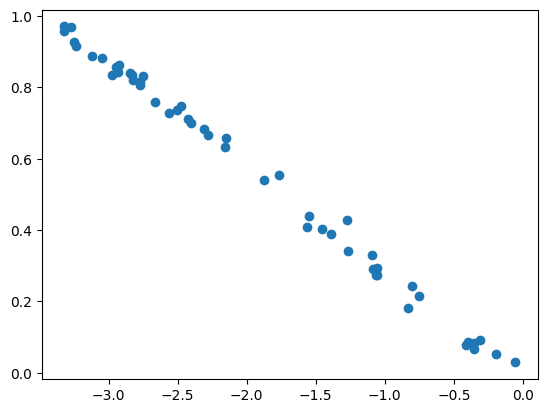

In [6]:
plt.scatter( mycebmf.L[:,0],u)

In [7]:
mycebmf.iter_once()
mycebmf._update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor([[ 0.3708,  0.5726,  0.1597,  ...,  0.7175, -0.0224,  0.5329],
        [ 0.4567,  0.6548,  0.1736,  ...,  0.8183, -0.0405,  0.6297],
        [ 0.3875,  0.6433,  0.2819,  ...,  0.8030,  0.0282,  0.5707],
        ...,
        [ 0.2321,  0.3533,  0.1078,  ...,  0.4550,  0.0230,  0.3440],
        [ 0.2516,  0.4037, -0.0193,  ...,  0.5458,  0.0017,  0.4175],
        [ 0.4774,  0.7520,  0.2226,  ...,  0.9410, -0.0038,  0.6934]])

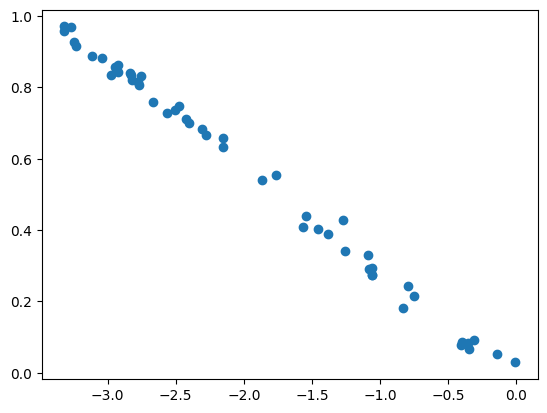

In [8]:
plt.scatter( mycebmf.L[:,0],u)

Converged after 57 iterations.


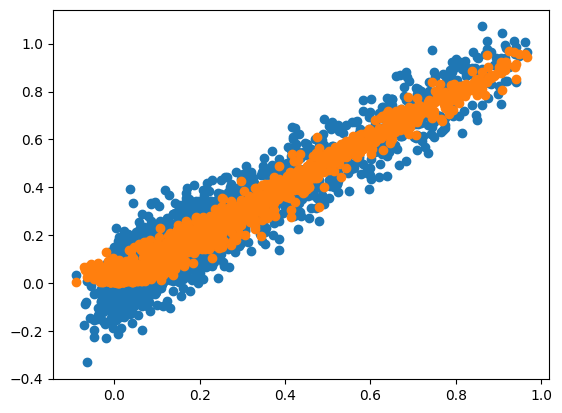

In [9]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
mycebmf=  cEBMF(data= noisy_matrix) 
mycebmf.initialise_factors()

In [11]:
mycebmf.fit()

Converged after 57 iterations.
Converged after 70 iterations.
Converged after 54 iterations.
Converged after 66 iterations.
Converged after 54 iterations.
Converged after 67 iterations.
Converged after 54 iterations.


CEBMFResult(L=tensor([[-2.5160],
        [-2.8692],
        [-2.8162],
        [-3.3726],
        [-0.3574],
        [-2.9930],
        [-2.1864],
        [-2.7069],
        [-2.1857],
        [-1.4084],
        [-3.0216],
        [-0.3484],
        [-2.7959],
        [-2.6053],
        [-2.4617],
        [-2.8674],
        [-1.0745],
        [-2.9728],
        [-3.0930],
        [-1.2815],
        [-3.1661],
        [-2.9743],
        [-1.2911],
        [-2.8192],
        [-1.1063],
        [-0.8119],
        [-1.1021],
        [-2.3161],
        [-2.5445],
        [-0.4022],
        [-0.4162],
        [-1.4790],
        [-2.4427],
        [-2.3463],
        [-1.0730],
        [-0.8445],
        [-3.3710],
        [-3.3249],
        [-2.8871],
        [-0.7661],
        [-0.1087],
        [-3.2831],
        [-0.0104],
        [-1.5683],
        [-1.7939],
        [-1.0797],
        [-0.3060],
        [-1.5881],
        [-1.8986],
        [-3.2972]]), F=tensor([[-0.1441],
        [-0.2

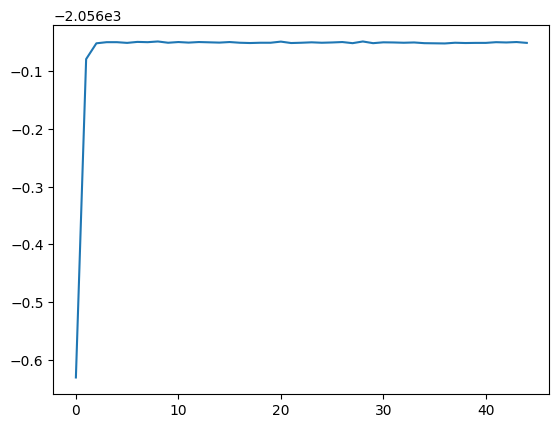

In [12]:
plt.plot(mycebmf.obj)

tensor(0.0017, dtype=torch.float64)

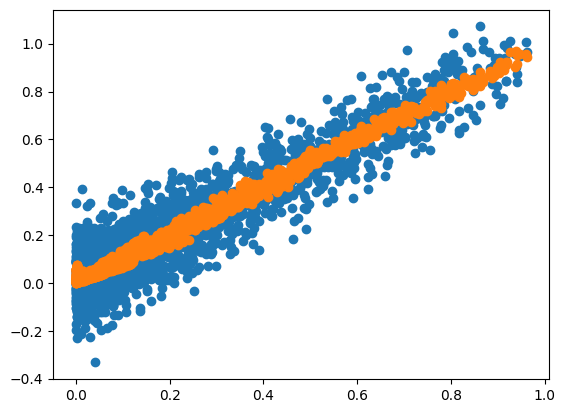

In [13]:
mycebmf._update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
tau_est =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, K=1) 
    mycebmf.initialise_factors()
    mycebmf.fit(50)
    
    mycebmf._update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
    tau_est.append(1/mycebmf.tau)
 

Converged after 85 iterations.
Converged after 83 iterations.
Converged after 85 iterations.
Converged after 84 iterations.
Converged after 83 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 85 iterations.
Converged after 85 iterations.
Converged after 85 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 83 iterations.
Converged after 84 iterations.
Converged after 85 iterations.
Converged after 85 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 85 iterations.
Converged after 85 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converged after 83 iterations.
Converged after 84 iterations.
Converged after 83 iterations.
Converged after 85 iterations.
Converged after 83 iterations.
Converged after 84 iterations.
Converged after 84 iterations.
Converge

: 

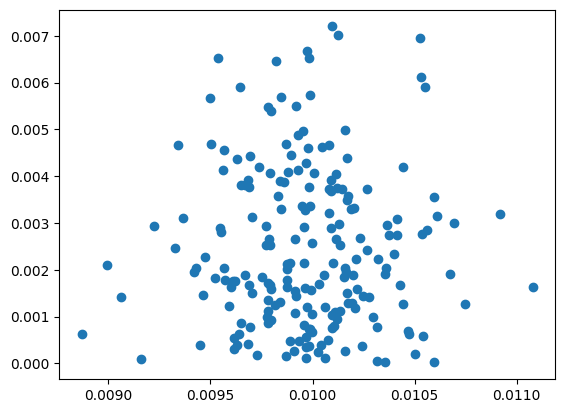

In [34]:
plt.scatter( tau_est, results)

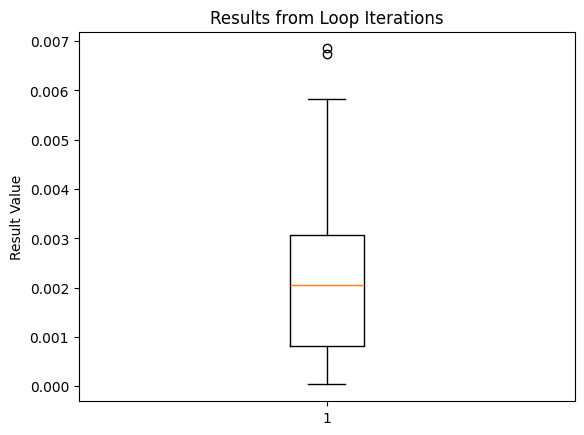

In [19]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [27]:
np.quantile(results,q=0.75)

np.float64(0.003063632249398673)

In [20]:
res= np.asarray(results)
np.mean(res )

np.float64(0.0020971847922891056)

In [17]:
# 0.002615278465597284